## Overall Goals
In many urban centers, bike-sharing systems offer a sustainable transit option but frequently suffer from inefficiencies such as underutilization and poor station placements. This project aims to use machine learning to dynamically adjust bike allocations and station locations in response to real-time demand influenced by environmental factors like weather and time of year. By analyzing datasets from Europe, Asia, and the US, the initiative will develop predictive models to enhance the operational efficiency of bike-sharing systems globally, thereby optimizing resource use and reducing urban congestion.

## Importing the libraries

In [ ]:
# for numerical computation
import pandas as pd
import numpy as np
from scipy import stats

# for Plotting
import matplotlib.pyplot as plt
import seaborn as sns

#for Regression
import sklearn.preprocessing as skp
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import sklearn.metrics as metrics


## Fetching/Reading Dataset
The project will utilize the following datasets: <br><br>
● Bike Sharing Dataset from UCI: Covering hourly and daily bike rental data
along with weather and seasonal information. This can be retrieved here https://archive.ics.uci.edu/dataset/275/bike+sharing+dataset<br><br>
● Seoul Bike Sharing Demand Dataset from UCI: Includes factors like
temperature, humidity, and precipitation. This can be retrieved here https://archive.ics.uci.edu/dataset/560/seoul+bike+sharing+demand<br><br>
● London Bike Sharing Dataset from Kaggle: Contains timestamped information
on bike rentals with associated weather and seasonal conditions. This can be
downloaded from the kaggle dataset here https://www.kaggle.com/datasets/hmavrodiev/london-bike-sharing-dataset.


In [ ]:
!pip install ucimlrepo

In [ ]:
from ucimlrepo import fetch_ucirepo
# fetch dataset of Bike Sharing in Washington DC
bike_sharing = fetch_ucirepo(id=275)
# data (as pandas dataframes)
X = bike_sharing.data.features
y = bike_sharing.data.targets
X['count']=y
dc_bike=X
dc_bike

<ipython-input-3-e4b6c0c7e6be>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['count']=y


,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,count
0,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,16
1,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,40
2,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,32
3,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,13
4,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,119
17375,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,89
17376,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,90
17377,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,61


In [ ]:
# fetch dataset of Bike Sharing in Seoul
seoul_bike_sharing_demand = fetch_ucirepo(id=560)
# data (as pandas dataframes)
X = seoul_bike_sharing_demand.data.features
y = seoul_bike_sharing_demand.data.targets
X['Function Day']=y
seoul_bike=X
seoul_bike

,Date,Rented Bike Count,Hour,Temperature,Humidity,Wind speed,Visibility,Dew point temperature,Solar Radiation,Rainfall,Snowfall,Seasons,Holiday,Function Day
0,1/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,1/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,1/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,1/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,1/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [ ]:
# Link to google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# London Bike Sharing Dataset
london_bike = pd.read_csv('/content/drive/My Drive/381 Project/london_merged.csv')
london_bike

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...
17409,2017-01-03 19:00:00,1042,5.0,1.0,81.0,19.0,3.0,0.0,0.0,3.0
17410,2017-01-03 20:00:00,541,5.0,1.0,81.0,21.0,4.0,0.0,0.0,3.0
17411,2017-01-03 21:00:00,337,5.5,1.5,78.5,24.0,4.0,0.0,0.0,3.0
17412,2017-01-03 22:00:00,224,5.5,1.5,76.0,23.0,4.0,0.0,0.0,3.0


## Data Prepeocessing

Variable name and format:

- date: month-day 2-2
- hour: int 0 - 24
- weather: 0: good weather, 1: bad weather
- temp: celcius
- hum: double %
- windspeed: m/s
- count: int


dc:


1. date: change dteday to date
2. delete holiday, season, months
3. weather: 0: good weather, 1: bad weather
4. delete atemp
5. convert temp to celcius by temp = temp * 47 - 8
6. windspeed: drop na, multiply by 67, convert from mph to m/s



Seoul:


1. date: change dteday to date
2. delete holiday, season, months
3. weather: if Rainfall ==0 and Snowfall == 0, weather = 0 (good weather), otherwise: weather = 1 (bad weather)
4. delete dew temperature
5. change variable name form rented bike count to count
6. change variable name Humidity to hum, then divide by 100
7. change vairbale name Windspeed to windspeed




London:

1. timestamp: delete first five elements, then split into date and hour, change to int
2. weather_code: if weather_code== 1&2&3&4: weather_code 0; if weather_code== 7&10&26&94: weather_code == 1
3. change variable name t1 to temp, delete t2
4. divide hum by 100
5. change vairbale name wind_speed to windspeed, divide by 3.6 (to convert km/h to m/s)
6. delete is_holiday, is_weekend, is_season

In [ ]:
# DC Bike Process
# 1. Rename 'dteday' to 'date'
dc_bike.rename(columns={'dteday': 'date'}, inplace=True)
# 2. Drop unnecessary columns
dc_bike.drop(['holiday', 'season', 'mnth', 'atemp'], axis=1, inplace=True)
# 3. Recode weather situation (assuming 'weathersit' contains the weather conditions)
# Assuming original coding is 1, 2, 3, 4 where 1 & 2 are good (0), 3 & 4 are bad (1)
dc_bike['weathersit'] = dc_bike['weathersit'].apply(lambda x: 0 if x in [1, 2] else 1)
# 4. Convert temperature from normalized value to Celsius
dc_bike['temp'] = dc_bike['temp'] * 47 - 8
# 5. Handle 'windspeed'
# Drop rows with NA in 'windspeed'
dc_bike.dropna(subset=['windspeed'], inplace=True)
# Multiply by 67 and convert from mph to m/s (1 mph = 0.44704 m/s)
dc_bike['windspeed'] = dc_bike['windspeed'] * 67 * 0.44704
# Check the modified DataFrame


<ipython-input-7-170b4e11434b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dc_bike.rename(columns={'dteday': 'date'}, inplace=True)
<ipython-input-7-170b4e11434b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dc_bike.drop(['holiday', 'season', 'mnth', 'atemp'], axis=1, inplace=True)
<ipython-input-7-170b4e11434b>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dc_bike['w

In [ ]:
dc_bike.drop(['yr', 'weekday', 'workingday'], axis=1, inplace=True)

<ipython-input-8-942e46fc6320>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dc_bike.drop(['yr', 'weekday', 'workingday'], axis=1, inplace=True)


In [ ]:
dc_bike=dc_bike[dc_bike.windspeed>0] # Drop the windspeed with zero windspeed

In [ ]:
dc_bike.reset_index(drop=True, inplace=True) # reset index

In [ ]:
dc_bike.rename(columns={'hr': 'hour'}, inplace=True)

<ipython-input-11-a6739527146f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dc_bike.rename(columns={'hr': 'hour'}, inplace=True)


In [ ]:
dc_bike.rename(columns={'weathersit': 'weather'}, inplace=True)

<ipython-input-12-607cb2b1a2b0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dc_bike.rename(columns={'weathersit': 'weather'}, inplace=True)


In [ ]:
dc_bike # This is the already cleaned dc_bikesharing data

,date,hour,weather,temp,hum,windspeed,count
0,2011-01-01,5,0,3.28,0.75,2.683671,1
1,2011-01-01,10,0,9.86,0.76,7.598741,36
2,2011-01-01,11,0,8.92,0.81,8.494296,56
3,2011-01-01,12,0,11.74,0.77,8.494296,84
4,2011-01-01,13,0,13.62,0.72,8.940576,94
...,...,...,...,...,...,...,...
15194,2012-12-31,19,0,4.22,0.60,4.918066,119
15195,2012-12-31,20,0,4.22,0.60,4.918066,89
15196,2012-12-31,21,0,4.22,0.60,4.918066,90
15197,2012-12-31,22,0,4.22,0.56,4.022511,61


In [ ]:
# Souel Bike Processing
# Rename the columns
seoul_bike.rename(columns={
    'Date': 'date',
    'Rented Bike Count': 'count',
    'Hour': 'hour',
    'Temperature': 'temp',
    'Humidity': 'hum',
    'Wind speed': 'windspeed',
}, inplace=True)
# Drop unnecessary columns
seoul_bike.drop(['Visibility', 'Dew point temperature', 'Solar Radiation', 'Seasons', 'Holiday', 'Function Day'], axis=1, inplace=True)
# Ensure date is in the YYYY-MM-DD format (if it's not already)
seoul_bike['date'] = pd.to_datetime(seoul_bike['date'], format='%d/%m/%Y').dt.strftime('%Y-%m-%d')
# Recode weather situation based on 'Rainfall(mm)' and 'Snowfall (cm)'
# A non-binary initial state where Rainfall > 0 or Snowfall > 0 indicates bad weather
seoul_bike['weather'] = seoul_bike.apply(lambda x: 1 if x['Rainfall'] > 0 or x['Snowfall'] > 0 else 0, axis=1)
# Convert 'hum' to double % format (assuming it needs conversion from integer percentage to decimal)
seoul_bike['hum'] = seoul_bike['hum'] / 100.0
# Drop the now unnecessary 'Rainfall(mm)' and 'Snowfall (cm)' columns as 'weather' is derived
seoul_bike.drop(['Rainfall', 'Snowfall'], axis=1, inplace=True)

In [ ]:
seoul_bike

,date,count,hour,temp,hum,windspeed,weather
0,2017-12-01,254,0,-5.2,0.37,2.2,0
1,2017-12-01,204,1,-5.5,0.38,0.8,0
2,2017-12-01,173,2,-6.0,0.39,1.0,0
3,2017-12-01,107,3,-6.2,0.40,0.9,0
4,2017-12-01,78,4,-6.0,0.36,2.3,0
...,...,...,...,...,...,...,...
8755,2018-11-30,1003,19,4.2,0.34,2.6,0
8756,2018-11-30,764,20,3.4,0.37,2.3,0
8757,2018-11-30,694,21,2.6,0.39,0.3,0
8758,2018-11-30,712,22,2.1,0.41,1.0,0


In [ ]:
# London Bike Process
london_bike['timestamp'] = pd.to_datetime(london_bike['timestamp'])
london_bike['date'] = london_bike['timestamp'].dt.strftime('%Y-%m-%d')
london_bike['hour'] = london_bike['timestamp'].dt.hour  # hour as an integer

# Recode 'weather_code' into a binary 'weather' column
good_weather_codes = {1, 2, 3, 4}  # Assuming these represent good weather
bad_weather_codes = {7, 10, 26, 94}  # Assuming these represent bad weather
london_bike['weather'] = london_bike['weather_code'].apply(lambda x: 0 if x in good_weather_codes else (1 if x in bad_weather_codes else None))

# Rename 't1' to 'temp' and delete 't2'
london_bike.rename(columns={'t1': 'temp'}, inplace=True)
london_bike.drop('t2', axis=1, inplace=True)

# Adjust 'hum' to be a decimal percentage
london_bike['hum'] = london_bike['hum'] / 100.0

# Rename 'wind_speed' to 'windspeed' and convert from km/h to m/s
london_bike.rename(columns={'wind_speed': 'windspeed'}, inplace=True)
london_bike['windspeed'] = london_bike['windspeed'] / 3.6

# Delete unnecessary columns
london_bike.drop(['is_holiday', 'is_weekend', 'season'], axis=1, inplace=True)

# Select only the columns you want to keep
london_bike = london_bike[['date', 'hour', 'weather', 'temp', 'hum', 'windspeed', 'cnt']]
london_bike.rename(columns={'cnt': 'count'}, inplace=True)


<ipython-input-16-04c74ce741e9>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  london_bike.rename(columns={'cnt': 'count'}, inplace=True)


In [ ]:
london_bike=london_bike[london_bike.windspeed>0] # Drop the windspeed with zero windspeed
london_bike.reset_index(drop=True, inplace=True) # reset index

In [ ]:
london_bike

,date,hour,weather,temp,hum,windspeed,count
0,2015-01-04,0,0,3.0,0.930,1.666667,182
1,2015-01-04,1,0,3.0,0.930,1.388889,138
2,2015-01-04,4,0,2.0,0.930,1.805556,47
3,2015-01-04,5,0,2.0,0.930,1.111111,46
4,2015-01-04,6,0,1.0,1.000,1.944444,51
...,...,...,...,...,...,...,...
17341,2017-01-03,19,0,5.0,0.810,5.277778,1042
17342,2017-01-03,20,0,5.0,0.810,5.833333,541
17343,2017-01-03,21,0,5.5,0.785,6.666667,337
17344,2017-01-03,22,0,5.5,0.760,6.388889,224


## Data Exploration

Stats:


- find std, mean, median of windspeed, humidity, temperature cross countries for comparison as a new col
- sum each country's weather_index and divide by total number of days
- merge all datasets
- find correlation among different weather factors that influence bike counts

- total days = total rows

Visualization:

- histogram: between counts and all other independent variables

- line graph: hour vs counts (%)
- bar chart: weather vs counts



--> Analysis: differentiate peak hours


#### This is the mean,median and std of windspeed of three cities

In [ ]:
dc_windspeed_mean = dc_bike['windspeed'].mean()
dc_windspeed_std = dc_bike['windspeed'].std()
dc_windspeed_median = dc_bike['windspeed'].median()
print(dc_windspeed_mean, dc_windspeed_std, dc_windspeed_median)

6.51039896779946 3.167953450531844 5.8106259200000006


In [ ]:
seoul_windspeed_mean = seoul_bike['windspeed'].mean()
seoul_windspeed_std = seoul_bike['windspeed'].std()
seoul_windspeed_median = seoul_bike['windspeed'].median()
print(seoul_windspeed_mean, seoul_windspeed_std, seoul_windspeed_median)

1.7249086757990868 1.0362999934025559 1.5


In [ ]:
london_windspeed_mean = london_bike['windspeed'].mean()
london_windspeed_std = london_bike['windspeed'].std()
london_windspeed_median = london_bike['windspeed'].median()
print(london_windspeed_mean, london_windspeed_std, london_windspeed_median)

4.4376238411246485 2.1796606792615774 4.166666666666667


#### This is the mean,median and std of temperature of three cities

In [ ]:
dc_temp_mean = dc_bike['temp'].mean()
dc_temp_std = dc_bike['temp'].std()
dc_temp_median = dc_bike['temp'].median()
print(dc_temp_mean, dc_temp_std, dc_temp_median)

15.408034739127574 9.069877537017543 15.5


In [ ]:
seoul_temp_mean = seoul_bike['temp'].mean()
seoul_temp_std = seoul_bike['temp'].std()
seoul_temp_median = seoul_bike['temp'].median()
print(seoul_temp_mean, seoul_temp_std, seoul_temp_median)

12.882922374429223 11.944825230027947 13.7


In [ ]:
london_temp_mean = london_bike['temp'].mean()
london_temp_std = london_bike['temp'].std()
london_temp_median = london_bike['temp'].median()
print(london_temp_mean, london_temp_std, london_temp_median)

12.481945885698913 5.567371073374317 12.5


#### This is the mean,median and std of humidity of three cities

In [ ]:
dc_hum_mean = dc_bike['hum'].mean()
dc_hum_std = dc_bike['hum'].std()
dc_hum_median = dc_bike['hum'].median()
print(dc_hum_mean, dc_hum_std, dc_hum_median)

0.6193282452792946 0.19232401703610816 0.62


In [ ]:
seoul_hum_mean = seoul_bike['hum'].mean()
seoul_hum_std = seoul_bike['hum'].std()
seoul_hum_median = seoul_bike['hum'].median()
print(seoul_hum_mean, seoul_hum_std, seoul_hum_median)

0.5822625570776256 0.2036241330156561 0.57


In [ ]:
london_hum_mean = london_bike['hum'].mean()
london_hum_std = london_bike['hum'].std()
london_hum_median = london_bike['hum'].median()
print(london_hum_mean, london_hum_std, london_hum_median)

0.7228140493485529 0.1430460479506996 0.745


This is the bad weather rate of three cities

In [ ]:
dc_bad_weather = dc_bike['weather'].sum()/len(dc_bike)
seoul_bad_weather = seoul_bike['weather'].sum()/len(seoul_bike)
london_bad_weather = london_bike['weather'].sum()/len(london_bike)
print(dc_bad_weather,seoul_bad_weather,london_bad_weather)

0.08586091190209882 0.10764840182648402 0.12746454514008992


In the comparison of the three cities—London, Washington, and Seoul—it is observed that temperature and humidity levels do not differ significantly among them due to their relatively similar temperate climate zones. However, Seoul exhibits notably lower wind speeds compared to the other two cities. This difference can be attributed to Seoul's dense urban architecture and the surrounding mountainous terrain, which can obstruct and reduce wind flow significantly through the city areas.

Using ANOVA test, we are going to compare whether the sample mean of the 3 datasets are the same.

In [ ]:
# temperature
f_value, p_value = stats.f_oneway(london_bike['temp'], seoul_bike['temp'], dc_bike['temp'])
print("F-value:", f_value)
print("P-value:", p_value)

F-value: 515.2884907182228
P-value: 9.10859569047718e-222


In [ ]:
# humidity
f_value, p_value = stats.f_oneway(london_bike['hum'], seoul_bike['hum'], dc_bike['hum'])
print("F-value:", f_value)
print("P-value:", p_value)

F-value: 2346.2997485597493
P-value: 0.0


In [ ]:
# windspeed
f_value, p_value = stats.f_oneway(london_bike['windspeed'], seoul_bike['windspeed'], dc_bike['windspeed'])
print("F-value:", f_value)
print("P-value:", p_value)

F-value: 10844.863968077138
P-value: 0.0


Since their P value are really low, we can see that the windspeed, humidity and temperature do have significant difference. We can **merge them together**, but we have to label the cities in the last column. And in later analysis, we have to make **seperate analysis of different cities**.

In [ ]:
# Merging three datasets
dc_bike['city']='Wachington DC'
seoul_bike['city']='Seoul'
london_bike['city']='London'
combined_bike = pd.concat([dc_bike, seoul_bike, london_bike], axis=0, ignore_index=True)
combined_bike

<ipython-input-37-9742e95d961e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dc_bike['city']='Wachington DC'


,date,hour,weather,temp,hum,windspeed,count,city
0,2011-01-01,5,0,3.28,0.750,2.683671,1,Wachington DC
1,2011-01-01,10,0,9.86,0.760,7.598741,36,Wachington DC
2,2011-01-01,11,0,8.92,0.810,8.494296,56,Wachington DC
3,2011-01-01,12,0,11.74,0.770,8.494296,84,Wachington DC
4,2011-01-01,13,0,13.62,0.720,8.940576,94,Wachington DC
...,...,...,...,...,...,...,...,...
41300,2017-01-03,19,0,5.00,0.810,5.277778,1042,London
41301,2017-01-03,20,0,5.00,0.810,5.833333,541,London
41302,2017-01-03,21,0,5.50,0.785,6.666667,337,London
41303,2017-01-03,22,0,5.50,0.760,6.388889,224,London


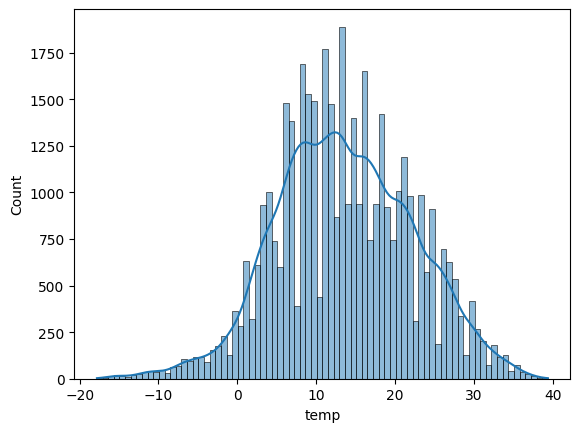

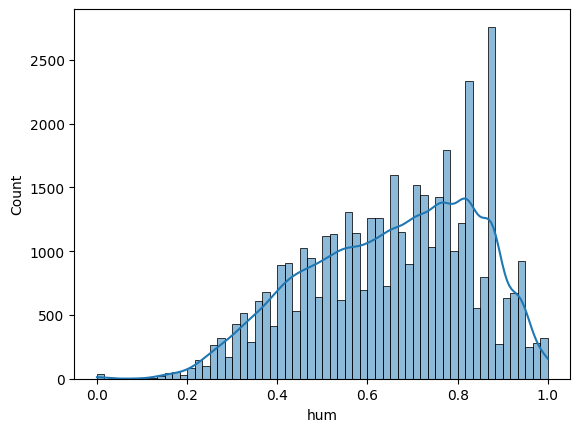

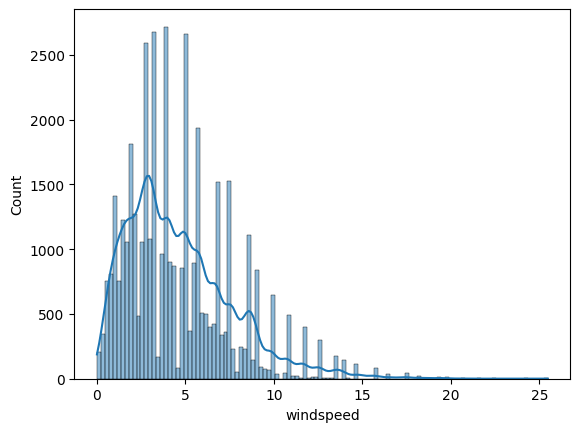

In [ ]:
# Plotting the data
sns.histplot(combined_bike['temp'],kde=True)
plt.show()
sns.histplot(combined_bike['hum'],kde=True)
plt.show()
sns.histplot(combined_bike['windspeed'],kde=True)
plt.show()

The interplay between weather conditions and bike rental trends presents a multifaceted picture:

- Temperature has a bell-shaped impact on rentals, peaking at a comfortable median that likely represents an ideal biking climate. Rentals taper off as temperatures become either cooler or hotter than this sweet spot, suggesting that people prefer not to bike when it's too cold or too warm.
- Humidity's effect on bike rentals is characterized by a leftward skew. Initial increases in humidity correspond with a rise in rental numbers, hinting at a tolerance for, or even a preference towards, some level of moisture in the air. However, this trend sharply reverses at higher humidity levels, possibly due to the discomfort associated with excessive humidity, deterring bike usage.
- Wind speed shows an inverse pattern, with a rightward skew indicating a clear preference for biking in less windy conditions. As wind speed picks up, bike rentals decline, implying that strong winds are a deterrent for cyclists.<br><br>
In essence, people are inclined to rent bikes under moderate, comfortable weather conditions—neither too hot nor too cold, with a preference for lower wind speeds and moderate humidity levels.

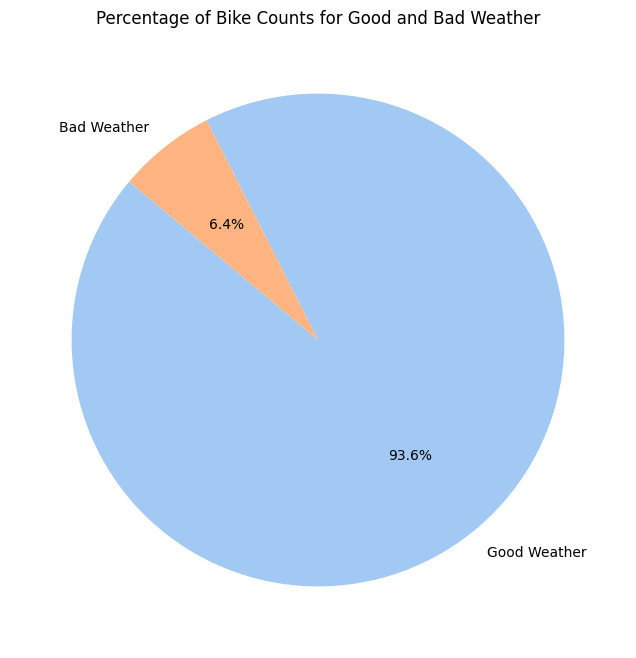

In [ ]:
weather_counts = combined_bike.groupby('weather')['count'].sum().reset_index()
weather_counts['weather'] = weather_counts['weather'].map({0: 'Good Weather', 1: 'Bad Weather'})

# Now we'll plot the pie chart using matplotlib's pie function
# after calculating the proportions using seaborn style formatting for color palettes.
colors = sns.color_palette('pastel')[0:2]

plt.figure(figsize=(8, 8))
plt.pie(weather_counts['count'], labels=weather_counts['weather'], colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Percentage of Bike Counts for Good and Bad Weather')
plt.show()

This suggests that people tend to get bike rentals on good weathers



In [ ]:

def process_data(data, city_name):
    # Ensure 'date' is a datetime type and add a 'City' column
    data['date'] = pd.to_datetime(data['date'])
    data['Weekday'] = data['date'].dt.day_name()
    data['City'] = city_name

    # Aggregate data by day of the week and city
    data_weekday = data.groupby(['Weekday', 'City'])['count'].sum().reset_index()

    # Calculate total counts for each city
    total_counts = data.groupby('City')['count'].sum().reset_index(name='Total')

    # Merge total counts back to the weekday data
    data_weekday = data_weekday.merge(total_counts, on='City')

    # Calculate the percentage
    data_weekday['Percentage'] = (data_weekday['count'] / data_weekday['Total']) * 100

    return data_weekday


# Process each dataset
dc_data = process_data(dc_bike, 'DC')
seoul_data = process_data(seoul_bike, 'Seoul')
london_data = process_data(london_bike, 'London')

# Combine all data into one DataFrame
combined_data = pd.concat([dc_data, seoul_data, london_data])
# Define the order of weekdays
weekday_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
combined_data['Weekday'] = pd.Categorical(combined_data['Weekday'], categories=weekday_order, ordered=True)
combined_data

<ipython-input-40-94d962761db3>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['date'] = pd.to_datetime(data['date'])
<ipython-input-40-94d962761db3>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Weekday'] = data['date'].dt.day_name()
<ipython-input-40-94d962761db3>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/s

,Weekday,City,count,Total,Percentage
0,Friday,DC,433989,2942476,14.749109
1,Monday,DC,407897,2942476,13.862373
2,Saturday,DC,429714,2942476,14.603823
3,Sunday,DC,397929,2942476,13.523611
4,Thursday,DC,440135,2942476,14.957981
5,Tuesday,DC,421624,2942476,14.328885
6,Wednesday,DC,411188,2942476,13.974218
0,Friday,Seoul,950334,6172314,15.396722
1,Monday,Seoul,911743,6172314,14.771494
2,Saturday,Seoul,885492,6172314,14.346192


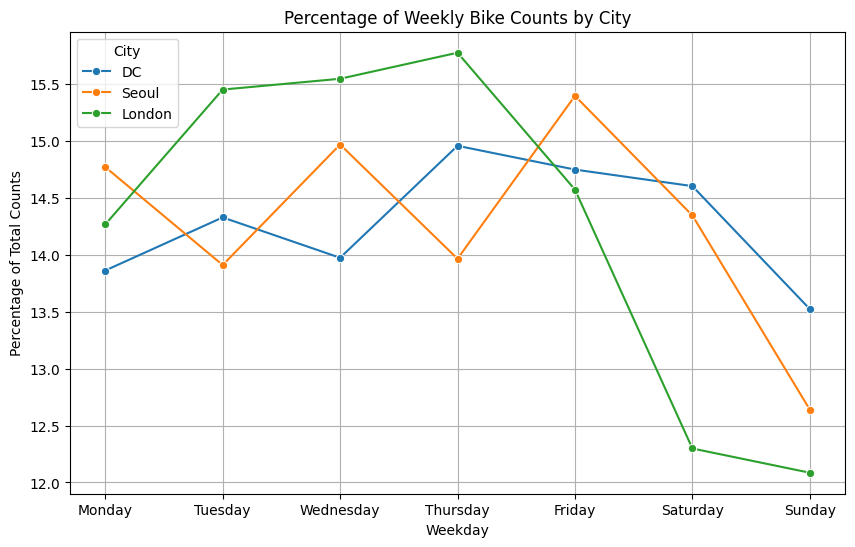

In [ ]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=combined_data, x='Weekday', y='Percentage', hue='City', marker='o', style='City', dashes=False)
plt.title('Percentage of Weekly Bike Counts by City')
plt.xlabel('Weekday')
plt.ylabel('Percentage of Total Counts')
plt.grid(True)
plt.legend(title='City', loc='upper left')
plt.show()



Analyzing the graph, there appears to be a notable correlation between bike usage and the day of the week for each city.

- London's cycling activity is more pronounced during the weekdays, particularly on Thursday, indicating a likely preference for cycling on workdays, with a notable drop on the weekend, especially on Saturday. This could point to the use of bikes predominantly for commuting purposes.

- In Seoul, bike usage fluctuates throughout the week but not very much, peaking on Friday, suggesting a progressive increase in cycling possibly for both commuting and recreational activities, with a surprising downturn on weekends.

- DC presents a relatively stable pattern of bike usage from Monday to Friday, implying consistent use throughout the workweek, which then drops slightly during the weekend, with the lowest bike count on Sunday, possibly due to reduced commuting and recreational activities.


## Analysis

Stats:

- 2 sample t-test


In [ ]:
from scipy.stats import ttest_ind

# Function to perform the t-test
def perform_t_tests(dataframe, city):
    # Filter weekday and weekend counts for the specified city
    weekday_counts = dataframe[(dataframe['City'] == city) & (dataframe['Weekday'].isin(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']))]['count']
    weekend_counts = dataframe[(dataframe['City'] == city) & (dataframe['Weekday'].isin(['Saturday', 'Sunday']))]['count']

    # Perform t-test
    stat, p_value = ttest_ind(weekday_counts, weekend_counts)

    return (stat, p_value)

cities = combined_data['City'].unique()
results = {}

for city in cities:
    stat, p_value = perform_t_tests(combined_data, city)
    print(f"{city} - T-statistic: {stat}, P-value: {p_value}")
    if p_value < 0.05:
        print(f"There is a statistically significant difference in bike rental counts between weekdays and weekends for {city}.")
    else:
        print(f"There is no statistically significant difference in bike rental counts between weekdays and weekends for {city}.")


DC - T-statistic: 0.680760595099353, P-value: 0.5262643271365659
There is no statistically significant difference in bike rental counts between weekdays and weekends for DC.
Seoul - T-statistic: 1.6750872328714603, P-value: 0.15476857702792024
There is no statistically significant difference in bike rental counts between weekdays and weekends for Seoul.
London - T-statistic: 5.885452021552864, P-value: 0.0020121128481040552
There is a statistically significant difference in bike rental counts between weekdays and weekends for London.


Thus, we can see apart from London, the other two cities does not have a significant difference between workdays and weekends in terms of bike counts. So the administrator do not need to give more bikes during the weekdays than the weekends.

In [ ]:
combined_bike

,date,hour,weather,temp,hum,windspeed,count,city
0,2011-01-01,5,0,3.28,0.750,2.683671,1,Wachington DC
1,2011-01-01,10,0,9.86,0.760,7.598741,36,Wachington DC
2,2011-01-01,11,0,8.92,0.810,8.494296,56,Wachington DC
3,2011-01-01,12,0,11.74,0.770,8.494296,84,Wachington DC
4,2011-01-01,13,0,13.62,0.720,8.940576,94,Wachington DC
...,...,...,...,...,...,...,...,...
41300,2017-01-03,19,0,5.00,0.810,5.277778,1042,London
41301,2017-01-03,20,0,5.00,0.810,5.833333,541,London
41302,2017-01-03,21,0,5.50,0.785,6.666667,337,London
41303,2017-01-03,22,0,5.50,0.760,6.388889,224,London


In [ ]:
hourly=combined_bike

     city  hour   count  total_count  percentage
0  London     0  209655     19862397    1.055537
1  London     1  144660     19862397    0.728311
2  London     2   96873     19862397    0.487721
3  London     3   67658     19862397    0.340634
4  London     4   52637     19862397    0.265008


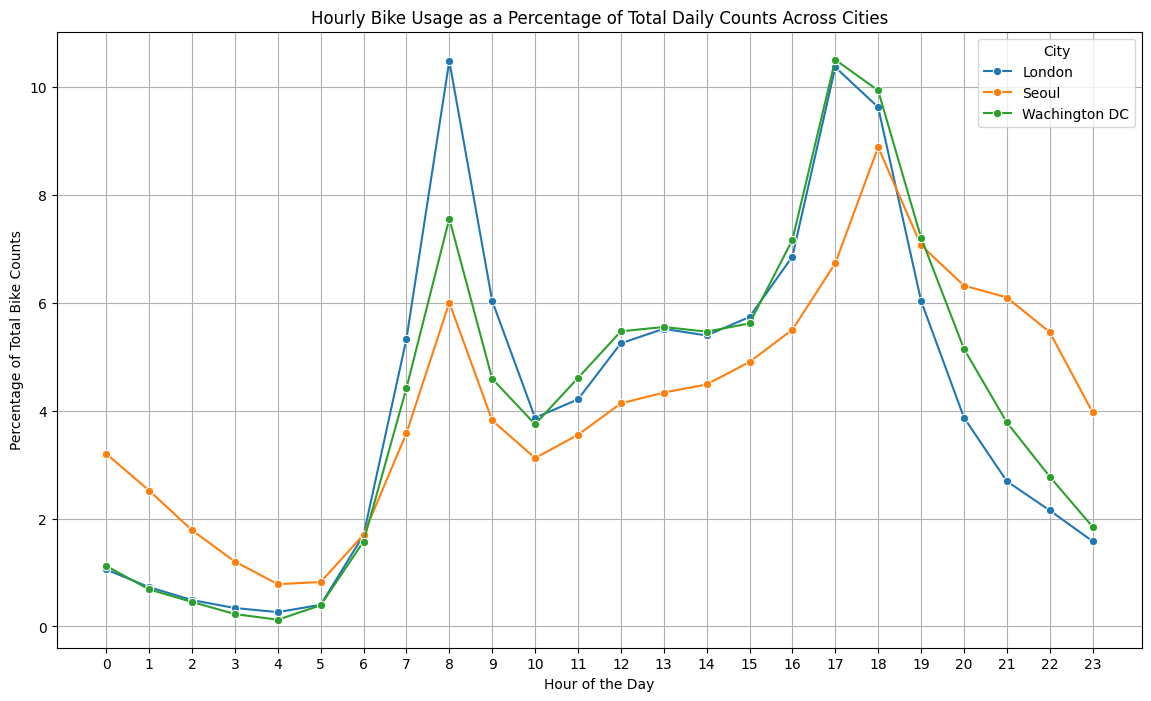

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Group by 'city' and 'hour' and sum the 'count'
hourly_counts = hourly.groupby(['city', 'hour'])['count'].sum().reset_index()

# Calculate total counts for each city
total_counts_by_city = hourly.groupby('city')['count'].sum().reset_index()
total_counts_by_city.rename(columns={'count': 'total_count'}, inplace=True)

# Merge the total counts back to the hourly data
hourly_counts = hourly_counts.merge(total_counts_by_city, on='city')

# Calculate the percentage of total counts for each hour
hourly_counts['percentage'] = (hourly_counts['count'] / hourly_counts['total_count']) * 100

# Check the DataFrame
print(hourly_counts.head())


# Plotting
plt.figure(figsize=(14, 8))
sns.lineplot(data=hourly_counts, x='hour', y='percentage', hue='city', marker='o')
plt.title('Hourly Bike Usage as a Percentage of Total Daily Counts Across Cities')
plt.xlabel('Hour of the Day')
plt.ylabel('Percentage of Total Bike Counts')
plt.xticks(range(24))  # Ensure labels for every hour
plt.grid(True)
plt.legend(title='City')
plt.show()

From the graph, we can see that during working hour (7am to 7pm), the working hour has much more bike rentals than the leisure hours

In [ ]:
working_hours = combined_bike[combined_bike['hour'].between(7, 19)]
leisure_hours = combined_bike[~combined_bike['hour'].between(7, 19)]

# Perform t-test
t_stat, p_val = stats.ttest_ind(working_hours['count'], leisure_hours['count'])

# The null hypothesis (H0): there is no difference in bike counts between working and leisure time
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_val}")

# Interpretation of the results
if p_val < 0.05:
    print("Reject the null hypothesis, there is a statistical difference in bike counts and leisure time.")
else:
    print("Fail to reject the null hypothesis, there is no statistical difference in bike counts and leisure time.")

T-statistic: 91.42659040315446
P-value: 0.0
Reject the null hypothesis, there is a statistical difference in bike counts and leisure time.


Since the p-value is so small, there is a significant difference between working hours and leisure hours. Thus, the administrator of bike sharing service should add more bikes during working hours, and doing bike maintaince during leisure hours.

## Extra Credit Machine Learning

The **predictor** is the model we train

In [ ]:
#!pip install autogluon

Training the model

In [ ]:
from sklearn.model_selection import train_test_split
from autogluon.tabular import TabularDataset, TabularPredictor

train, test = train_test_split(london_bike, test_size=0.2, random_state=42)
train.to_csv('/content/train.csv', index=False)
test.to_csv('/content/test.csv', index=False)
train_data = TabularDataset('/content/train.csv')
test_data = TabularDataset('/content/test.csv')

predictor = TabularPredictor(label='count').fit(train_data=train_data)

# Predict
predictions = predictor.predict(test_data)

# Print predictions
print(predictions)

No path specified. Models will be saved in: "AutogluonModels/ag-20240503_225530"
No presets specified! To achieve strong results with AutoGluon, it is recommended to use the available presets.
	Recommended Presets (For more details refer to https://auto.gluon.ai/stable/tutorials/tabular/tabular-essentials.html#presets):
	presets='best_quality'   : Maximize accuracy. Default time_limit=3600.
	presets='high_quality'   : Strong accuracy with fast inference speed. Default time_limit=3600.
	presets='good_quality'   : Good accuracy with very fast inference speed. Default time_limit=3600.
	presets='medium_quality' : Fast training time, ideal for initial prototyping.
Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels/ag-20240503_225530"
=================== System Info ===================
AutoGluon Version:  1.1.0
Python Version:     3.10.12
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Sat Nov 18 15:31:17 UTC 2023
C

[1000]	valid_set's rmse: 248.055
[2000]	valid_set's rmse: 230.517
[3000]	valid_set's rmse: 224.156
[4000]	valid_set's rmse: 219.614
[5000]	valid_set's rmse: 216.15
[6000]	valid_set's rmse: 213.981
[7000]	valid_set's rmse: 212.139
[8000]	valid_set's rmse: 210.308
[9000]	valid_set's rmse: 208.59
[10000]	valid_set's rmse: 207.61


	-207.6042	 = Validation score   (-root_mean_squared_error)
	21.41s	 = Training   runtime
	5.51s	 = Validation runtime
Fitting model: LightGBM ...


[1000]	valid_set's rmse: 203.696
[2000]	valid_set's rmse: 195.558
[3000]	valid_set's rmse: 192.31
[4000]	valid_set's rmse: 191.06
[5000]	valid_set's rmse: 190.244
[6000]	valid_set's rmse: 189.62
[7000]	valid_set's rmse: 189.348
[8000]	valid_set's rmse: 188.943
[9000]	valid_set's rmse: 188.605
[10000]	valid_set's rmse: 188.468


	-188.458	 = Validation score   (-root_mean_squared_error)
	15.02s	 = Training   runtime
	3.88s	 = Validation runtime
Fitting model: RandomForestMSE ...
	-250.2871	 = Validation score   (-root_mean_squared_error)
	22.04s	 = Training   runtime
	0.26s	 = Validation runtime
Fitting model: CatBoost ...
	-189.0096	 = Validation score   (-root_mean_squared_error)
	231.87s	 = Training   runtime
	0.04s	 = Validation runtime
Fitting model: ExtraTreesMSE ...
	-261.5055	 = Validation score   (-root_mean_squared_error)
	11.01s	 = Training   runtime
	0.22s	 = Validation runtime
Fitting model: NeuralNetFastAI ...
	-288.8382	 = Validation score   (-root_mean_squared_error)
	25.36s	 = Training   runtime
	0.07s	 = Validation runtime
Fitting model: XGBoost ...
	-198.1502	 = Validation score   (-root_mean_squared_error)
	35.51s	 = Training   runtime
	4.89s	 = Validation runtime
Fitting model: NeuralNetTorch ...
	-255.8256	 = Validation score   (-root_mean_squared_error)
	107.19s	 = Training   runtime
	0.

[1000]	valid_set's rmse: 191.404
[2000]	valid_set's rmse: 188.505
[3000]	valid_set's rmse: 187.56
[4000]	valid_set's rmse: 187.262
[5000]	valid_set's rmse: 187.127
[6000]	valid_set's rmse: 187.085
[7000]	valid_set's rmse: 187.087


	-187.0795	 = Validation score   (-root_mean_squared_error)
	24.29s	 = Training   runtime
	3.43s	 = Validation runtime
Fitting model: WeightedEnsemble_L2 ...
	Ensemble Weights: {'LightGBMLarge': 0.4, 'LightGBM': 0.28, 'CatBoost': 0.28, 'XGBoost': 0.04}
	-180.2079	 = Validation score   (-root_mean_squared_error)
	0.04s	 = Training   runtime
	0.0s	 = Validation runtime
AutoGluon training complete, total runtime = 537.18s ... Best model: "WeightedEnsemble_L2"
TabularPredictor saved. To load, use: predictor = TabularPredictor.load("AutogluonModels/ag-20240503_225530")


0       2724.577637
1        354.560181
2        466.177338
3       3820.538574
4         92.494209
           ...     
3465    2301.182129
3466    1158.170898
3467      34.403454
3468    1819.686768
3469    1419.177124
Name: count, Length: 3470, dtype: float32


**Features and Preprocessing** <br>
The model uses temperature (temp), humidity (hum), windspeed (windspeed), hourly data (hour), and weather conditions (weather). Categorical data includes weekdays, and datetime features are expanded from the date field. Uninformative features like 'city' were dropped.

**Model Structure** <br>
The best-performing model, WeightedEnsemble_L2, combines several base models:

LightGBMLarge and LightGBM: Gradient boosting models for diverse data handling.<br>
CatBoost: Optimized for categorical input.<br>
XGBoost: Known for performance in structured datasets.<br>
These models are weighted (40%, 28%, 28%, and 4% respectively) to form a robust ensemble that leverages their individual strengths.

In [ ]:
predictor.evaluate(test_data, silent=True)

{'root_mean_squared_error': -184.06674098303733,
 'mean_squared_error': -33880.56513611656,
 'mean_absolute_error': -95.99097536950015,
 'r2': 0.9706621390008512,
 'pearsonr': 0.985226648286741,
 'median_absolute_error': -50.564361572265625}

In [ ]:
predictions

0       2724.577637
1        354.560181
2        466.177338
3       3820.538574
4         92.494209
           ...     
3465    2301.182129
3466    1158.170898
3467      34.403454
3468    1819.686768
3469    1419.177124
Name: count, Length: 3470, dtype: float32

Since the R Square is close to 1, the model did a good prediction, and we can use this model to predict how many bike should be distributed with certain temperature, humidity and windspeed at certain time period



## Conclusion

### Key Insights
- **Weather Impact:** Optimal biking conditions are characterized by moderate temperatures and lower humidity levels. High winds and extreme temperatures reduce bike rental frequency.
- **Temporal Demand:** Peak bike rental times are from 7 AM to 7 PM, aligning with typical commuting hours. London shows increased rentals on weekdays, while Seoul and DC demonstrate more even distribution throughout the week.

### Recommendations
1. **Adapt to Weather Conditions:**
   - **Dynamic Availability:** Adjust the number of bikes available based on the weather forecast. Increase availability during ideal weather conditions and decrease during poor weather.
   - **Protective Measures:** Invest in infrastructure improvements such as covered bike stations to protect bikes from adverse weather, making rentals more appealing.

2. **Optimize Fleet Operations:**
   - **Peak Hours Focus:** Ensure sufficient bike availability during peak hours to support commuting needs. Consider scaling down during off-peak hours to save resources and manage fleet maintenance.
   - **Weekend Strategy:** In London, reduce fleet size on weekends due to lower demand. In Seoul and DC, maintain a consistent fleet size to accommodate steady weekend rentals.

3. **Enhanced User Engagement:**
   - **Promotional Activities:** Implement promotional campaigns to encourage bike usage during weekends, especially in London where there is a notable drop.
   - **Real-Time Information:** Develop or enhance mobile apps to provide real-time information on bike availability and weather conditions, helping users better plan their trips.

### Implementation
These strategies are aimed at improving user satisfaction and operational efficiency. By aligning the bike availability with demand patterns and weather conditions, the bike-sharing service can optimize resource usage and enhance the overall user experience.